<font size = 6>
    <center><b>Top 5 Bukkas for Investors in Lagos, Nigeria</b></center>

<font size = 4> **Table of Contents**

1 *[Introduction](#item1)*
  * *[Business Problem](#item1a)*
  * *[Objective](#item1b)*
  * *[Description of Dataset](#item1c)*
    

2 *[Data Acquisition and Wrangling](#item2)*
  * *[Data Source and Type](#item2a)*
  * *[Data Cleaning](#item2b)*
  * *[Feature Selection](#item2c)*
  * *[Data Visualization](#item2d)*
    
    
3 *[Methodology](#item3)*
    
    
4 *[Results and Discussion](#item4)*
    
   
5 *[Conclusion](#item5)*
    
    
6 *[Appendix](#item6)*
  * *[References](#item6a)*
  * *[Author](#item6b)*
    

# Introduction <a class="anchor" id="item1"></a> 

## Business Problem <a class="anchor" id="item1a"></a> 

Lagos is the most populous city in Nigeria and the African continent. According to Wikipedia, Lagos is a major financial centre for all of Africa and a megacity with the fourth-highest GDP in Africa and houses one of the largest and busiest seaports on the continent. It is one of the fastest-growing cities in the world.

This megacity is a good place to either start a business or invest in businesses. Different business categories are booming in Lagos, Nigeria but the top 10 categories are namely:

* Restaurant and Catering Services
* Food Processing
* Mini Importation
* Transportation
* Daycare services
* Clothing
* Agricultural Products
* ICT
* Real Estate
* Oil & Gas

Some of the business categories listed above (E.g Oil & Gas, Real Estate) require a huge sum of capital and operating cost but have huge return-on-investment (ROI). While other categories (E.g Restaurant, Clothing, Daycare) require moderate/low sum of capital and operating cost with good ROI.

In this project, my focus is on the Restaurant and Catering Services category. There are numerous restaurants in every street of Lagos and I have classified them into 3 categories:

* Eatery: This category belongs to the high-class and foreign restaurants and requires huge investment. They are popular and often have branches in every local government area (LGA) in Lagos State and other States. People patronise them not only because of the delicious taste of meals they sell but also for the well-conditioned and relaxing environment. Examples are KFC, Tastee Fried Chicken, Hard Rock Cafe, Tantalizer, Chicken Republic, Domino's Pizza, Mama Cass and more. 

* Bukka: This category belongs to the middle-class restaurants and requires moderate investment. They are well-known as a result of the delicious and pleasurable taste of meals they sell. Recently, a man of God called Pastor E.A Adeboye endorsed them during a Sunday Service because of the quality and tasty meals they sell. The environment, canteens, where they sell the food may not be classy and conducive for eating, therefore, most people prefer to buy their foods in food-packs (takeout) 

* Mama-put: This category belongs to the low-class restaurants and requires low investment. They are often patronized by low-income earners because of the low price with a satisfactory quantity of food they sell. The quality and taste of their meals may or may not be as good as the other categories. The environment they sell the food is not always conducive for eating because they are often found on the roadside, selling food from a handcart.

Investing in Bukkas with high potential of becoming high-class restaurants will be a good investment because they already have the market. The investment will be on improving the environment to a well-furnished and relaxing outlet, standard of operation and opening more branches.

Mama Cass is an example of this type of investment. It started as a Bukka with a single branch and became an eatery with 13 outlets, competing with other high-class restaurants.

## Objective <a class="anchor" id="item1b"></a>

The objective of this project is to find Bukkas with the potentials of becoming high-class restaurants, within 3km radius of the administrative capital of each local government area of Lagos State.

## Description of Datasets <a class="anchor" id="item1c"></a>

The datasets I used for this project were acquired from Wikipedia and Macrotrends. Wikipedia dataset consists of the names and administrative capitals of all the local government areas in Lagos State. It also consists of the area dimension (in squared-kilometre) of each LGA and its population. Although the population data is not up to date because the last population census was carried out in 2006. 

Therefore, I estimated the year 2021 projected population to guide me in making a more accurate decision in siting appropriate venues for the branches. The 2021 projected population was estimated by using the Lagos State growth rate from 2007 to 2021.

The coordinates (latitude and longitude) of each administrative capital of all LGA of Lagos state were determined and appended to the data frame by using arcgis geocode API. I used the data frame with filter-query to send a get request to Foursquare API to retrieve the nearby restaurants within 3km radius of the administrative capital of each LGA.

<a class="anchor" id="item2"></a> 

# Data Acquisition and Wrangling


## Data Source and Type <a class="anchor" id="item2a"></a>

* Data sources: 
  1. [Wikipedia Dataset](https://en.wikipedia.org/wiki/Lagos_State)
  2. [Macrotrends Dataset](https://www.macrotrends.net/cities/22007/lagos/population#:~:text=The%20current%20metro%20area%20population,a%203.28%25%20increase%20from%202018)
  
* Data type: html

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
url1 = 'https://en.wikipedia.org/wiki/Lagos_State'
url2 = 'https://www.macrotrends.net/cities/22007/lagos/population#:~:text=The%20current%20metro%20area%20population,a%203.28%25%20increase%20from%202018'

lagos_data1 = pd.read_html(url1)              # Reading Lagos State LGA Data from Wikipedia 
lagos_data2 = pd.read_html(url2, header = 1)  # Reading Lagos State growth rate from Macrotrends

In [3]:
# Print out first 5 rows from Wikipedia dataset

lagos_data1[2].head()

,LGA name,Area (km2),Census 2006 population,Administrative capital,Postalcode
0,Agege,11,459939,Agege,100.0
1,Alimosho,185,1277714,Ikotun,100.0
2,Ifako-Ijaye,27,427878,Ifako,100.0
3,Ikeja,46,313196,Ikeja,100.0
4,Kosofe,81,665393,Kosofe,100.0


In [4]:
# Print out first 5 rows from Macrotrends dataset

lagos_data2[1].head()

,Year,Population,Growth Rate
0,2021,14862000,3.44%
1,2020,14368000,3.34%
2,2019,13904000,3.28%
3,2018,13463000,3.23%
4,2017,13042000,3.23%


## Data Cleaning <a class="anchor" id="item2b"></a>

The data read from the sources contains irrelevant and missing values. Since the data types are HTML, there are irrelevant web texts before the tables needed for this project. 

Firstly, I extracted the relevant tables within the web texts into a pandas data frame. 

In the Wikipedia dataset, there are NaN values in some columns because the LGAs are grouped into divisions - consisting of area summation and population summation. I removed the division rows from the data frame to eliminate the NaN values. Also, a square-bracket with number '[33]' attached to the admin capital of Ibeju_Lekki (Akodo) was removed. I dropped the postal code column because it is not unique for each LGA, that is, some LGAs have the same postal code. The columns were rearranged.

In Macrotrends dataset, only the growth rates from 2007 - 2021 are needed, therefore, I removed the rows below the year 2007 from the data frame. The population column was removed from the data frame since we already have a population column in the Wikipedia dataset. The data type in the growth rate column is dtype-object and therefore cannot be used to estimate the 2021 projected population. Firstly, I removed the '%' attached to the data and then changed the data type to 'float 64' dtype.

In [5]:
# Clean Wikipedia Dataset

df1 = lagos_data1[2].copy()
df1.dropna(subset=['Postalcode'], axis = 0, inplace = True)
df1.drop(['Postalcode'], axis = 1, inplace = True)
df1.sort_values('LGA name', inplace = True)
df1.reset_index(drop=True, inplace = True)
df1 = df1[['LGA name', 'Administrative capital', 'Area (km2)', 'Census 2006 population']]
df1.set_index('LGA name', inplace = True)
df1['Administrative capital'].replace({'Akodo[33]': 'Akodo'}, inplace = True)

In [6]:
# Print cleaned Wikipedia Dataset

print('Total LGA in Lagos State is', df1.shape[0])
print()
print('Lagos State population according to 2006 population census is ',df1['Census 2006 population'].sum()) 
print('----------------------------------------------------------------------')
df1.head()

Total LGA in Lagos State is 20

Lagos State population according to 2006 population census is  9013534
----------------------------------------------------------------------


,Administrative capital,Area (km2),Census 2006 population
LGA name,,,
Agege,Agege,11,459939
Ajeromi-Ifelodun,Ajeromi/Ifelodun,12,684105
Alimosho,Ikotun,185,1277714
Amuwo-Odofin,Festac Town,135,318166
Apapa,Apapa,27,217362


In [7]:
# Check the data type of Macrotrends Dataset

df2 = lagos_data2[1].copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         72 non-null     int64 
 1   Population   72 non-null     int64 
 2   Growth Rate  72 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [8]:
# Clean Macrotrends Dataset

df2.drop('Population', axis = 1, inplace = True)
df2 = df2[df2['Year']>2006]

df2['Growth Rate'] = list(map(lambda x: x[:-1], df2['Growth Rate'].values))
df2['Growth Rate'] = [float(x) for x in df2['Growth Rate'].values]
df2['Average Growth Rate'] = df2['Growth Rate'].mean().round(2)

In [9]:
# Print cleaned Macrotrends Dataset

print('The average growth rate of Lagos State from 2007 to 2021 is ', df2['Growth Rate'].mean().round(2))
df2.head()

The average growth rate of Lagos State from 2007 to 2021 is  3.25


,Year,Growth Rate,Average Growth Rate
0,2021,3.44,3.25
1,2020,3.34,3.25
2,2019,3.28,3.25
3,2018,3.23,3.25
4,2017,3.23,3.25


## Feature Selection <a class="anchor" id="item2c"></a>

In macrotrends dataset, I selected 'year’ and 'growth rate' features while 'population feature' was dropped because it is not subdivided into LGA population. 'Average Growth Rate' feature was added.

In Wikipedia dataset, only the 'postal code' and 'census 2006 population' features were dropped while 'Projected 2021 population' feature was added into the data frame. 

Projected 2021 population = Census 2006 population $*$ $\exp^{(Average Growth Rate * Period)}$

Assumption:
The growth rate in all LGAs of Lagos State is the same.

Also, the geographical coordinates (Latitudes and Longitudes) of the Administrative capitals for all LGAs were added into the data frame as seen under visualization subheading.

In [10]:
df_lagos = df1.copy()


df_lagos['Projected 2021 population'] = (df_lagos['Census 2006 population'] * np.exp(3.25/100 * (2021 - 2006))).astype('int64')
df_lagos.drop(['Census 2006 population'], axis = 1, inplace = True)
df_lagos.sort_values('Projected 2021 population', ascending = False, inplace = True)

In [11]:
# Print lagos dataframe with 2021 population

print('Lagos State projected population for year 2021 is ', df_lagos['Projected 2021 population'].sum())
print('-----------------------------------------------------------')

df_lagos.head()

Lagos State projected population for year 2021 is  14676191
-----------------------------------------------------------


,Administrative capital,Area (km2),Projected 2021 population
LGA name,,,
Alimosho,Ikotun,185,2080425
Ajeromi-Ifelodun,Ajeromi/Ifelodun,12,1113887
Kosofe,Kosofe,81,1083419
Mushin,Mushin,17,1030690
Oshodi-Isolo,Oshodi/Isolo,45,1011966


## Data Visualization <a class="anchor" id="item2d"></a>

Firstly, I imported the required libraries and credentials. Population and Area of each LGA of Lagos State were visualized on horizontal bar charts. I made a visual comparison between population and area for each LGA on a horizontal bar chart. To be able to visually compare population and area on the same chart, I normalised the dataset.

I used Nominatim to retrieve the coordinates of all the LGA of Lagos State. The coordinates were appended to the data frame (df_lagos). With these coordinates, I created a map with folium to display (with markers) all the 20 LGAs of Lagos state. Each marker when clicked on shows the name of the LGA, Administrative capital and population of the LGA.

In [12]:
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import json # library to handle JSON files
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline 

import folium # map rendering library

# Import Foursquare API Credentials
import os
from dotenv import load_dotenv
load_dotenv() 

CLIENT_ID = os.getenv('Foursquare_ID')               
CLIENT_SECRET = os.getenv('Foursquare_Secret')       
ACCESS_TOKEN = os.getenv('Foursquare_AccessToken')   
VERSION = '20180604'
LIMIT = 500

print('Credentials: successful')

print('Libraries imported.')

Credentials: successful
Libraries imported.


In [13]:
visual_data = df_lagos.copy()
visual_data.drop(['Administrative capital'], axis = 1, inplace = True)

In [14]:
%%capture PopulationChart

# Horizontal bar chart for population

visual_data.sort_values(by='Projected 2021 population', ascending=True, inplace=True)
visual_data['Projected 2021 population'].plot(kind='barh', figsize=(12, 10), width = 0.7, color = ['darkorange'])
plt.xlabel('2021 Population', color = 'black')
plt.ylabel('LGA', color = 'black')
plt.title('2021 Projected population for each LGA of Lagos State')

for index, value in enumerate(visual_data['Projected 2021 population']): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value - 163000, index - 0.2), color='black')

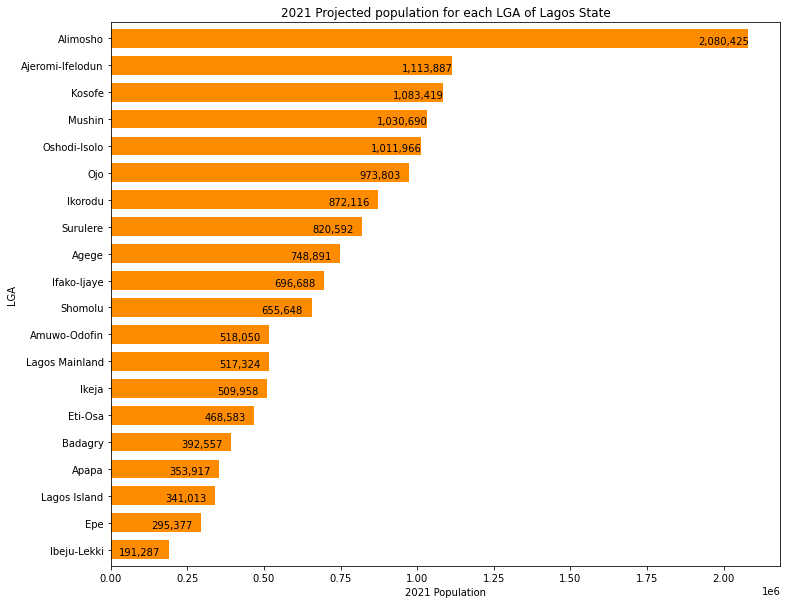

In [15]:
# Visualize population of each LGA of Lagos State

PopulationChart.show()

In [16]:
%%capture AreaChart

# Horizontal bar chart for Area

visual_data.sort_values(by='Area (km2)', ascending=True, inplace=True)
visual_data['Area (km2)'].plot(kind='barh', figsize=(12, 10), width = 0.7)
plt.xlabel('Area (km2)', color = 'black')
plt.ylabel('LGA', color = 'black')
plt.title('Area (km2) of each LGA of Lagos State')

for index, value in enumerate(visual_data['Area (km2)']): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value - 1, index - 0.2), color='black')

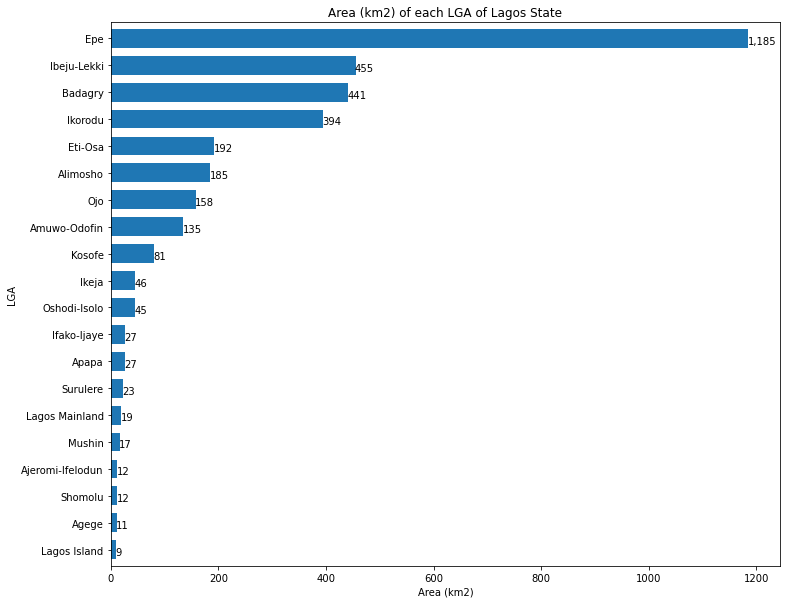

In [17]:
# Visualize land area of each LGA of Lagos State

AreaChart.show()

In [18]:
%%capture PopulationVsAreaChart

# Horizontal bar chart for population vs area

visual_data.sort_values(by='Projected 2021 population', ascending=True, inplace=True)
visual_data['Projected 2021 population'] = visual_data['Projected 2021 population']/visual_data['Projected 2021 population'].max()
visual_data['Area (km2)'] = visual_data['Area (km2)']/visual_data['Area (km2)'].max()

visual_data.plot(kind='barh', figsize=(12, 10), width = 0.7, color = ['steelblue', 'darkorange'])
plt.xlabel('Population / Area (km2)', color = 'black')
plt.ylabel('LGA', color = 'black')
plt.title('Population vs Area(km) for each LGA of Lagos State')

Text(0.5, 1.0, 'Population vs Area(km) for each LGA of Lagos State')

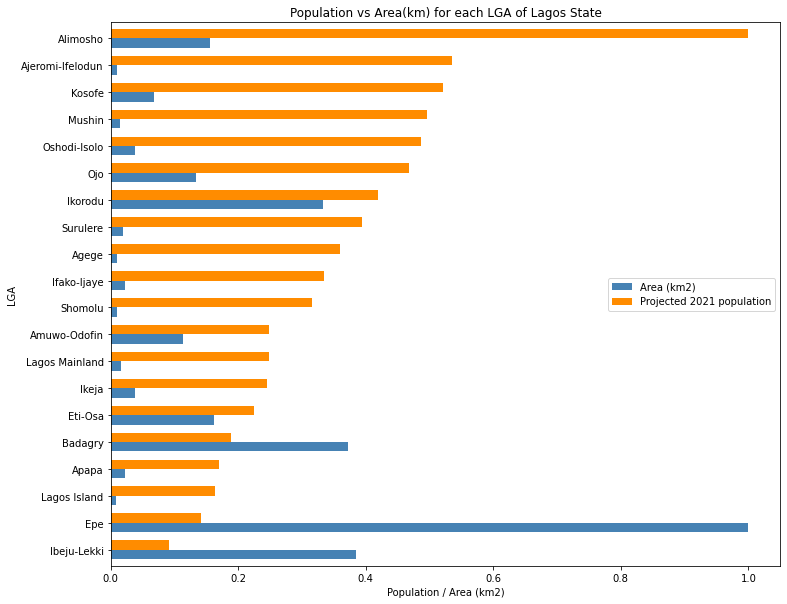

In [19]:
# Visualizing correlation between Population and Land Area of each LGA of Lagos State

PopulationVsAreaChart.show()

In [20]:
# Use arcgis geocode to retrieve the coordinates of each admin capital

admin_capital = df_lagos['Administrative capital']

latitude = []
longitude= []

for name in admin_capital:
    g = geocoder.arcgis('{}, Lagos, Nigeria'.format(name))
    latlng = g.latlng
    print('The geograpical coordinates of {} are {}, {}.'.format(name, latlng[0], latlng[1]))
    latitude.append(latlng[0])
    longitude.append(latlng[1])

The geograpical coordinates of Ikotun are 6.44972000000007, 3.087440000000072.
The geograpical coordinates of Ajeromi/Ifelodun are 6.459410000000048, 3.3405500000000643.
The geograpical coordinates of Kosofe are 6.599990000000048, 3.4150900000000206.
The geograpical coordinates of Mushin are 6.53174000000007, 3.3470100000000684.
The geograpical coordinates of Oshodi/Isolo are 6.521350000000041, 3.3186300000000415.
The geograpical coordinates of Ojo are 6.462620000000072, 3.166960000000074.
The geograpical coordinates of Ikorodu are 6.6235600000000545, 3.5048300000000268.
The geograpical coordinates of Surulere are 6.489320000000021, 3.358000000000061.
The geograpical coordinates of Agege are 6.6256100000000515, 3.312620000000038.
The geograpical coordinates of Ifako are 6.643940000000043, 3.326430000000073.
The geograpical coordinates of Shomolu are 6.537850000000049, 3.385340000000042.
The geograpical coordinates of Festac Town are 6.465660000000071, 3.3034600000000296.
The geograpica

In [21]:
# Append the coordinates to the dataframe

df_lagos['Latitude'] = latitude
df_lagos['Longitude'] = longitude

In [22]:
# Print lagos dataframe with appended coordinates 

df_lagos

,Administrative capital,Area (km2),Projected 2021 population,Latitude,Longitude
LGA name,,,,,
Alimosho,Ikotun,185,2080425,6.44972,3.08744
Ajeromi-Ifelodun,Ajeromi/Ifelodun,12,1113887,6.45941,3.34055
Kosofe,Kosofe,81,1083419,6.59999,3.41509
Mushin,Mushin,17,1030690,6.53174,3.34701
Oshodi-Isolo,Oshodi/Isolo,45,1011966,6.52135,3.31863
Ojo,Ojo,158,973803,6.46262,3.16696
Ikorodu,Ikorodu,394,872116,6.62356,3.50483
Surulere,Surulere,23,820592,6.48932,3.35800
Agege,Agege,11,748891,6.62561,3.31262


In [24]:
# Use Nominatim to retrieve the coordinates of Lagos State

address = 'Lagos State, Nigeria'

geolocator = Nominatim(user_agent="LAG_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Lagos State, Nigeria are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Lagos State, Nigeria are 6.4550575, 3.3941795.


In [25]:
# Plot all LGA with admin capital and population in a map

map_lagos = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, LGA, admin_capital, population in zip(df_lagos['Latitude'], 
                                                    df_lagos['Longitude'], 
                                                    df_lagos.index,
                                                    df_lagos['Administrative capital'],
                                                    df_lagos['Projected 2021 population']):
       
    label = '{}, {}, {}'.format(LGA, admin_capital, population)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lagos)  

In [26]:
# Display lagos map with all LGA

map_lagos

<a class="anchor" id="item3"></a> 

# Methodology

This project aims to identify restaurants in the bukka category (med/low investment and operating cost) with high ROI potentials and recommend for investment. The steps taken are as follows:

Firstly, a get request with filter-query ('restaurant') was sent to the Foursquare API (explore endpoint) to retrieve all restaurants within a 3km radius of the Aministrtative Capital of each local government area of Lagos State. 

The results returned by the Foursquare API were cleaned.

The results were filtered to eliminate restaurants that do not belong to the bukka category. That is, restaurants that already have more 3 branches or restaurants with high investment and operating cost.

The Foursquare IDs of each bukka were used to send a get request to Foursquare API (details endpoint) to retrieve the ratings of all the bukkas.

Lastly, the ratings were used to group the bukkas.

In [27]:
# Use Foursquare API to retrieve all restaurants within a 3km radius of the Aministrtative Capital of each local government area of Lagos State

def getNearbyRestaurants(names, admin_capitals, latitudes, longitudes, query = 'restaurant', radius = 3000):
    
    restaurants_list=[]
    for name, admin_capital, lat, lng in zip(names, admin_capitals, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng,
                query,
                radius, 
                LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        print('{} restaurant(s) found in 3km radius of {}.'.format(len(results),
                                                                    admin_capital
                                                                  )
             )
        
        # return only relevant information for each nearby restaurant
        for v in results:
            restaurants_list.append([(name,
                                     admin_capital,
                                     v['venue']['name'],
                                     v['venue']['id'],
                                     v['venue']['location']['formattedAddress'],
                                     v['venue']['location']['lat'], 
                                     v['venue']['location']['lng'],  
                                     v['venue']['categories'][0]['name'])])
            
            
                             
    nearby_restaurants = pd.DataFrame([item for restaurant_list in restaurants_list for item in restaurant_list])
    nearby_restaurants.columns = ['LGA name',
                                  'Administrative capital', 
                                  'Restaurant',
                                  'ID',
                                  'Address',
                                  'Latitude', 
                                  'Longitude', 
                                  'Category']
    nearby_restaurants.set_index('LGA name', inplace = True)
    
    return(nearby_restaurants)

In [28]:
# Assign import parameters

lagos_restaurant = getNearbyRestaurants(names = df_lagos.index,
                                        admin_capitals = df_lagos['Administrative capital'],
                                        latitudes = df_lagos['Latitude'],
                                        longitudes = df_lagos['Longitude']
                                        )

0 restaurant(s) found in 3km radius of Ikotun.
5 restaurant(s) found in 3km radius of Ajeromi/Ifelodun.
4 restaurant(s) found in 3km radius of Kosofe.
14 restaurant(s) found in 3km radius of Mushin.
4 restaurant(s) found in 3km radius of Oshodi/Isolo.
1 restaurant(s) found in 3km radius of Ojo.
3 restaurant(s) found in 3km radius of Ikorodu.
19 restaurant(s) found in 3km radius of Surulere.
4 restaurant(s) found in 3km radius of Agege.
7 restaurant(s) found in 3km radius of Ifako.
13 restaurant(s) found in 3km radius of Shomolu.
7 restaurant(s) found in 3km radius of Festac Town.
22 restaurant(s) found in 3km radius of Lagos Mainland.
44 restaurant(s) found in 3km radius of Ikeja.
41 restaurant(s) found in 3km radius of Ikoyi.
1 restaurant(s) found in 3km radius of Badagry.
6 restaurant(s) found in 3km radius of Apapa.
11 restaurant(s) found in 3km radius of Lagos Island.
0 restaurant(s) found in 3km radius of Epe.
0 restaurant(s) found in 3km radius of Akodo.


In [29]:
# Clean results retrieved from Foursquare API

lagos_restaurant['Address'] = lagos_restaurant['Address'].str[0]
lagos_restaurant['Address'].replace({'Nigeria': 'Lagos'}, inplace = True)

In [30]:
# Print out restaurants retrieved from Foursquare API

print('Total number of restaurants returned by Foursquare API is ', lagos_restaurant.shape[0])
lagos_restaurant.head()

Total number of restaurants returned by Foursquare API is  206


,Administrative capital,Restaurant,ID,Address,Latitude,Longitude,Category
LGA name,,,,,,,
Ajeromi-Ifelodun,Ajeromi/Ifelodun,tank and tummy festac,4d4ea5e9ae4e60fce52c02a2,amuwo odofin,6.477172,3.332893,Fast Food Restaurant
Ajeromi-Ifelodun,Ajeromi/Ifelodun,Mario's Pizza & Fast Food,4c55b8de30f92d7f0a269ebc,14 Bristol Rd,6.447261,3.359209,Pizza Place
Ajeromi-Ifelodun,Ajeromi/Ifelodun,"Kingston Jo, Apapa",50125f9ce4b07f20b26c70a3,Apapa,6.451433,3.364584,Fast Food Restaurant
Ajeromi-Ifelodun,Ajeromi/Ifelodun,Odiche House,4d8a410699c2a1cd80ca8cd7,76 Coker Road,6.485127,3.335702,Bakery
Ajeromi-Ifelodun,Ajeromi/Ifelodun,Chicken Republic,4c5723f9cc96c9b6a04a782e,1b Liverpool Rd,6.441617,3.360164,Fast Food Restaurant


In [31]:
# Print out African restaurants retrieved from Foursquare API

lagos_Afri = lagos_restaurant[lagos_restaurant['Category'] == 'African Restaurant']
lagos_Afri = lagos_Afri.drop(lagos_Afri[lagos_Afri['Restaurant']=='Olaiya Amala'].index[0])

In [32]:
# Print out African restaurants retrieved from Foursquare API

print('Total number of African restaurants returned by Foursquare API is ', lagos_Afri.shape[0])
lagos_Afri

Total number of African restaurants returned by Foursquare API is  9


,Administrative capital,Restaurant,ID,Address,Latitude,Longitude,Category
LGA name,,,,,,,
Ikorodu,Ikorodu,Fatmot Restaurant,50374439e4b05b4c79f8f7da,"5, Lagos Rd",6.630483,3.510461,African Restaurant
Lagos Mainland,Lagos Mainland,White House,4d344e1098336dcb474236f0,Commercial Avenue Yaba (Yaba),6.506143,3.375522,African Restaurant
Lagos Mainland,Lagos Mainland,Olaiya Amala,4f64f3e7e4b03a7ce173376d,Akerele rd,6.503535,3.358119,African Restaurant
Ikeja,Ikeja,Yellow Chilli,4f78ae22e4b0f52dba4a8b5a,GRA (Joel Ogunnaike Crescent),6.585071,3.352314,African Restaurant
Ikeja,Ikeja,The Place,4de210257d8b2547eafb0e8b,Ikeja,6.584293,3.356951,African Restaurant
Ikeja,Ikeja,Goat Hunters,4d090df300e6b1f79acf10d7,Adelelke Street,6.601134,3.351368,African Restaurant
Ikeja,Ikeja,Kobis,4c51be450ef3a5937398847c,"Kudirat Abiola Way, Oregun",6.602415,3.363003,African Restaurant
Ikeja,Ikeja,Sweet Sensation,4c795c3da8683704e74f104d,"Isaac John Street, Ikeja",6.583430,3.359992,African Restaurant
Lagos Island,Lagos Island,Ghana High Buka,51dbe2c8498e3264a8aa5bc4,McCarthy Street,6.446439,3.405491,African Restaurant


In [33]:
# Filter out restaurants that do not belong to bukka category

conditions = (lagos_Afri['Restaurant'] != 'The Place') &                     \
             (lagos_Afri['Restaurant'] != 'Sweet Sensation') &               \
             (lagos_Afri['Restaurant'] != 'Yellow Chilli') &                 \
             (lagos_Afri['Restaurant'] != 'Nok by Alara') &                  \
             (lagos_Afri['Restaurant'] != 'L\'afrique Restaurant & Bar') &   \
             (lagos_Afri['Restaurant'] != 'Kobis')        
             
lagos_bukka = lagos_Afri[conditions]

In [34]:
# Print out filtered lagos bukka result

print('Total number of Bukkas found in the LGAs of Lagos State is ', lagos_bukka.shape[0])
lagos_bukka

Total number of Bukkas found in the LGAs of Lagos State is  5


,Administrative capital,Restaurant,ID,Address,Latitude,Longitude,Category
LGA name,,,,,,,
Ikorodu,Ikorodu,Fatmot Restaurant,50374439e4b05b4c79f8f7da,"5, Lagos Rd",6.630483,3.510461,African Restaurant
Lagos Mainland,Lagos Mainland,White House,4d344e1098336dcb474236f0,Commercial Avenue Yaba (Yaba),6.506143,3.375522,African Restaurant
Lagos Mainland,Lagos Mainland,Olaiya Amala,4f64f3e7e4b03a7ce173376d,Akerele rd,6.503535,3.358119,African Restaurant
Ikeja,Ikeja,Goat Hunters,4d090df300e6b1f79acf10d7,Adelelke Street,6.601134,3.351368,African Restaurant
Lagos Island,Lagos Island,Ghana High Buka,51dbe2c8498e3264a8aa5bc4,McCarthy Street,6.446439,3.405491,African Restaurant


In [35]:
#  Using Foursquare API to retrieve the ratings of all the bukkas within a 3km radius of the Aministrtative Capital

def getRestaurantRatings(names, restaurants, restaurant_ids, restaurant_addresses):
    
    ratings_list=[]
    for name, restaurant, restaurant_id, address in zip(names, restaurants, restaurant_ids, restaurant_addresses):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(restaurant_id, 
                                                                                                                 CLIENT_ID, 
                                                                                                                 CLIENT_SECRET,
                                                                                                                 ACCESS_TOKEN, 
                                                                                                                 VERSION 
                                                                                                                 )
        # make the GET request
        results = requests.get(url).json()['response']['venue']['rating']
        try:
            print('{} rating is {}.'.format(restaurant, results))
        except:
            print('{} has not been rated yet.'.format(restaurant))
        
        ratings_list.append([(name,
                             restaurant,
                             address,
                             results
                             )])

                             
    rated = pd.DataFrame([item for rating_list in ratings_list for item in rating_list])
    rated.columns = ['LGA name',
                     'Resturant',
                     'Address',
                     'Rating']
    rated.set_index('LGA name', inplace = True)
    
    return(rated)

In [36]:
# Assign import parameters

lagos_ratedbukka = getRestaurantRatings(names = lagos_bukka.index,
                                        restaurants = lagos_bukka['Restaurant'],
                                        restaurant_ids = lagos_bukka['ID'],
                                        restaurant_addresses = lagos_bukka['Address']
                                       )

Fatmot Restaurant rating is 7.4.
White House rating is 8.0.
Olaiya Amala rating is 7.2.
Goat Hunters rating is 6.6.
Ghana High Buka rating is 7.2.


# Results and Discusion <a class="anchor" id="item4"></a> 

## Result

In [37]:
# Sort Lagos bukkas according to their ratings in descending order

lagos_ratedbukka.sort_values('Rating', ascending = False, inplace = True)

In [38]:
# Print out rated lagos bukka

lagos_ratedbukka

,Resturant,Address,Rating
LGA name,,,
Lagos Mainland,White House,Commercial Avenue Yaba (Yaba),8.0
Ikorodu,Fatmot Restaurant,"5, Lagos Rd",7.4
Lagos Mainland,Olaiya Amala,Akerele rd,7.2
Lagos Island,Ghana High Buka,McCarthy Street,7.2
Ikeja,Goat Hunters,Adelelke Street,6.6


## Discussion

From the analysis above, most of the restaurants are sited in Ikeja LGA(44), Eti-Osa LGA(41), Lagos Mainland LGA(22), Surulere LGA(19) and Mushin(14). These are the top 5 LGA with the highest number of restaurants within 3km radius of their Administrative Capitals. The results also showed that there are no restaurants within 3km radius of the Administrative Capital of Alimosho, Epe and Ibeju-Lekki LGAs.

Most of the restaurants in all the LGAs are high class or foreign restaurants and do not have branches opened in other LGAs except for some few restaurants subcategorized as 'Fast Food Restaurant' and 'Pizza place'. They have huge investments and their operational costs are high. I filtered out this restaurant category because we are only looking for restaurants (in bukka category) with moderate investments and low cost of operations.

The filtered result showed 5 restaurants that belong to bukka category: 
* 1 bukka (Fatmot Restaurant) at Ikorodu LGA
* 2 bukkas (White House, Olaiya Amala) at Lagos Mainland LGA
* 1 bukka (Goat Hunters) at Ikeja LGA and 
* 1 bukka (Ghana High Bukka) at Lagos Island LGA.

The final analysis showed the rating of each 5 bukka identified with the potentials of becoming high-class restaurants. The rating range is between 0 to 10. All the bukkas identified were rated above 6.0. This means they are popular and provide good customer services to their customers.

# Conclusion <a class="anchor" id="item5"></a>

I recommend these bukkas according to their ratings for investment. White House restaurant has the highest rating and very popular but its environment is not conducive for eating. I used google photos to explore bukkas' buildings or environments. In terms of environment, Olaiya Amala (Olaiya Food and Catering Services) has a better environment than the other 4 bukkas. 

I will recommend opening new branches for any of these bukkas in the most populated LGAs like Alimosho, Ajeromi-Ifelodun and Kosofe. These 3 most populated LGAs have no or few restaurants within a 3km radius of their Administrative Capitals. 

I will also recommend opening new branches at Epe and Ibeju-Lekki because they have no restaurants sited within a 3km radius of their Administrative Capitals. Though they have the lowest population, they have high standards of living and the largest areas of land.

# Appendix <a class="anchor" id="item6"></a>

## References <a class="anchor" id="item6a"></a>

* [Foursquare API Documentation](https://developer.foursquare.com/docs/api-reference/venues/explore/)

* [TTADESUSI Data Science GitHub Repo](https://github.com/ttadesusi/IBM-Data-Science-Professional-Certification)

* [Coursera | IBM Data Science](https://www.coursera.org/professional-certificates/ibm-data-science?) 

## Author <a class="anchor" id="item6b"></a>

* [Temitope Adesusi](https://www.linkedin.com/in/ttadesusi)